# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Import general packages and YLXPS-related packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os 
import scipy
import importlib

sys.path.insert(0, '../../purity-monitor/')
sys.path.insert(0, '../analysis/')
import HelperClasses as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

# Data Read-In

 | Filename... C:/Data/20210215\Vacuum_Au-Thorslabs_C-100V_A-600V_1.h5
 | Number of files in ch1...	 81/81
 | Number of files in ch2...	 81/81
 | Filename... C:/Data/20210215\Vacuum_Au-Thorslabs_RemoveLevelmeter_C-200V_A-1000V_1.h5
 | Number of files in ch1...	 65/146
 | Number of files in ch2...	 65/146
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  22.015625 sec
Ticks:  50


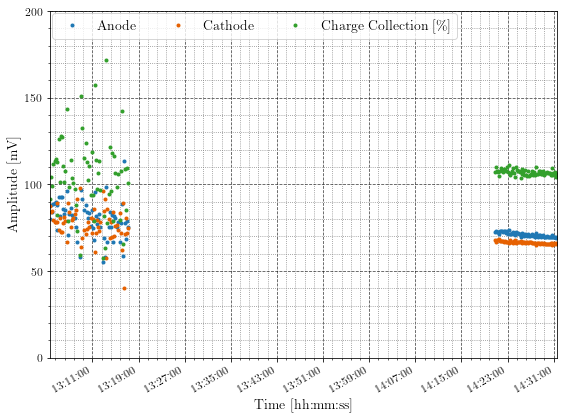

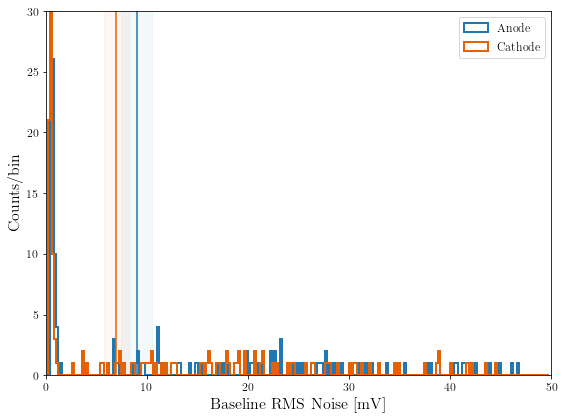

In [8]:
D1 = Dataset.Dataset(Path='C:/Data/20210215/', Selection='*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=50, YMax=200)
plt.savefig('amplitude.png', bbox_inches='tight', dpi=600)
D1.ShowBaselineNoise(BinMax=50)

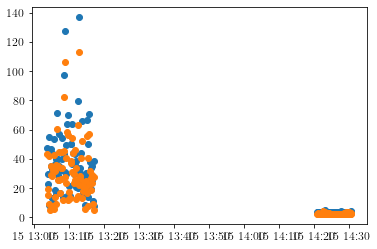

In [4]:
plt.scatter(D1.Ch[0].TimeStamp, D1.Ch[0].BaseStd)
plt.scatter(D1.Ch[1].TimeStamp, D1.Ch[1].BaseStd)

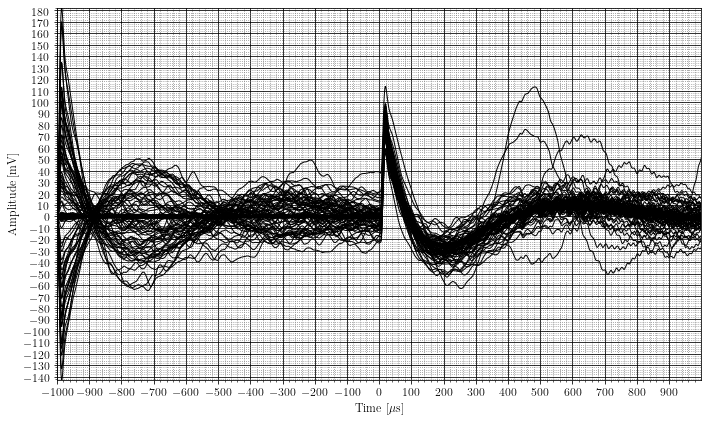

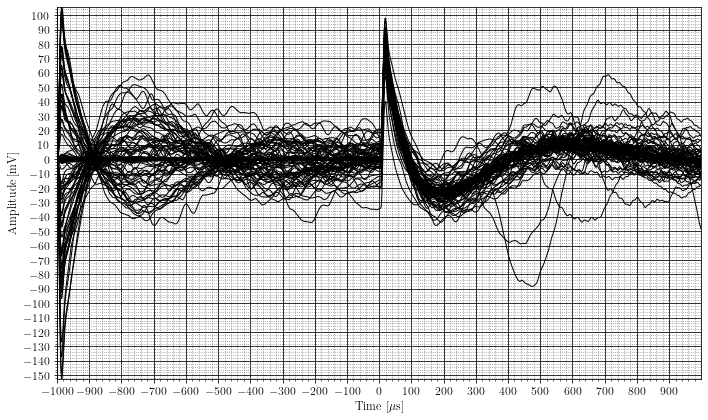

In [5]:
Plt.PltWfm(Time=D1.Ch[0].Time,
           Data=D1.Ch[0].AmpClean[D1.Cut],
           Legend=['Anode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')
Plt.PltWfm(Time=D1.Ch[1].Time,
           Data=D1.Ch[1].AmpClean[D1.Cut],
           Legend=['Anode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')
plt.show()

 | Filename... C:/Data/20210215\Vacuum_Au-Thorslabs_RemoveLevelmeter_C-200V_A-1000V_1.h5
 | Number of files in ch1...	 61/61
 | Number of files in ch2...	 61/61
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  15.734375 sec
Ticks:  50


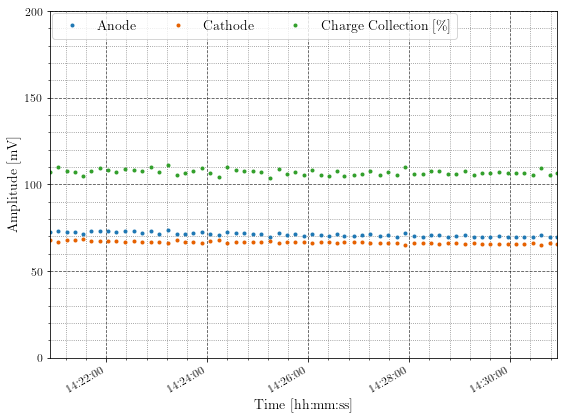

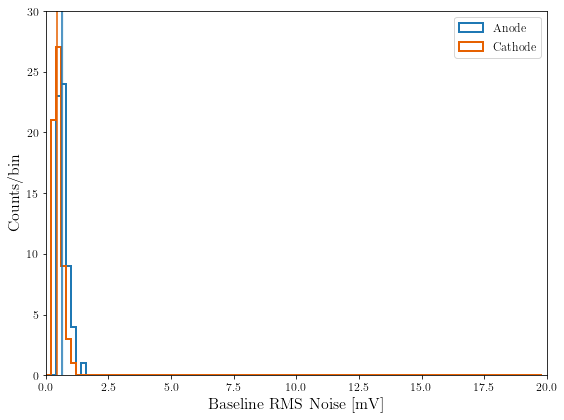

In [6]:
D2 = Dataset.Dataset(Path='C:/Data/20210215/', Selection='*Remove*')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=50, YMax=200)
D2.ShowBaselineNoise()

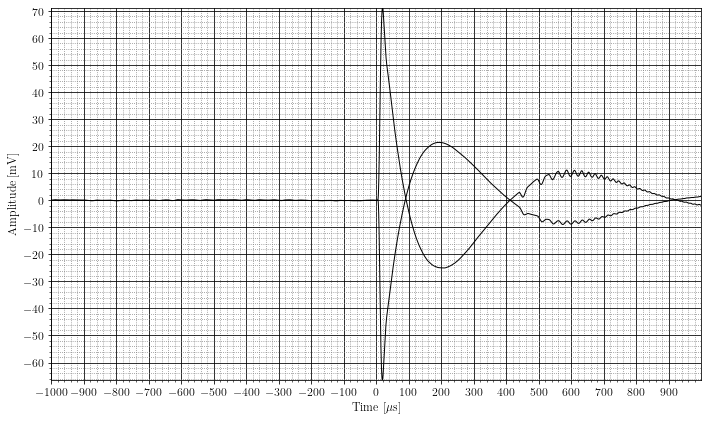

In [7]:
Plt.PltWfm(Time=D2.Ch[0].Time,
           Data=[np.mean(D2.Ch[0].AmpClean[D2.Cut], axis=0), np.mean(D2.Ch[1].AmpClean[D2.Cut], axis=0)*-1],
           Legend=['Anode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')
plt.show()